<a href="https://colab.research.google.com/github/ysooj/ysooj.github.io/blob/main/challenge_team_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/도전과제_넷플릭스/netflix_reviews.csv')  # 파일 불러오기

In [36]:
df.sort_values(by='at', inplace=True)   # df를 날짜 순(at 열)으로 정렬하기

In [37]:
df.isnull().sum()   # df의 결측치 개수 확인하기

,0
reviewId,0
userName,2
content,2
score,0
thumbsUpCount,0
reviewCreatedVersion,17562
at,0
appVersion,17562


In [38]:
df['userName'] = df['userName'].fillna('anonymous')   # userName 열의 결측치를 anonymous로 채우기
print(df['score'].min())   # 최솟값 확인하기
print(df['score'].max())   # 최댓값 확인하기

1
5


In [39]:
# content 열에 결측치가 있는 경우 score에 따라 내용을 채우는 함수 생성하기
def content_filled(row):
    if pd.isnull(row['content']):
        if row['score'] == 5:
            return 'I love it.'
        elif row['score'] == 4:
            return 'I like it.'
        elif row['score'] == 3:
            return 'So-so.'
        elif row['score'] == 2:
            return 'Not good.'
        elif row['score'] == 1:
            return 'Bad.'
    else:
        return row['content']

# content 열의 결측치 처리하기
df['content'] = df.apply(content_filled, axis=1)

# content 열의 결측치 다시 확인하기
df[df['content'].isnull()]

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion


In [40]:
df['reviewCreatedVersion'] = df['reviewCreatedVersion'].ffill()   # ffill() : 결측값을 바로 위 값과 동일하게 변경한다.

In [41]:
df['appVersion'] = df['appVersion'].ffill()   # ffill로 결측치 채우기

In [42]:
df.isnull().sum()   # df 결측치가 남아있는지 다시 확인하기

,0
reviewId,0
userName,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


In [43]:
print(df.duplicated().sum())

287


In [44]:
df = df.drop_duplicates(keep='first')
print(df.duplicated().sum())

0


In [45]:
# 전처리 함수 만들기
import re

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거.  \d+는 하나 이상의 숫자를 찾는 정규표현식
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [46]:
df.loc[:, 'content'] = df['content'].apply(lambda x: preprocess_text(x))

In [14]:
!pip install torch torchvision torchaudio

In [15]:
!pip install torchtext==0.17.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [16]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

reviews = df['content'].tolist()
ratings = df['score'].tolist()
# # 축소 테스트용
# reviews = reviews[0:500]
# reviews
# ratings = ratings[0:500]
# ratings

# 토크나이저 및 레이블 인코더 정의
tokenizer = get_tokenizer("basic_english")
label_encoder = LabelEncoder()

# 어휘 사전 구축 함수
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(reviews), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

vocab_size = len(vocab)

# 텍스트와 레이블 파이프라인 정의
text_pipeline = lambda x: vocab(tokenizer(x))
label_pipeline = lambda x: label_encoder.fit_transform([x])[0]

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)


    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review, dtype=torch.long), torch.tensor(rating)  # torch.tensor(review)을 torch.tensor(review, dtype=torch.long)으로 고쳤다.

# 학습용 데이터와 평가용 데이터 나누기
train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews, ratings, test_size = 0.2, random_state = 42)

# 데이터 로더 정의
BATCH_SIZE = 64

train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

from torch.nn.utils.rnn import pad_sequence  # PyTorch의 유틸리티 함수로, 변동 길이의 시퀀스를 패딩하여 동일한 길이로 만드는 데 사용된다.

# 패딩 적용 함수
def collate_fn(batch):
    reviews, ratings = zip(*batch)
    reviews_padded = pad_sequence(reviews, batch_first=True, padding_value=0)  # 0으로 패딩
    ratings = torch.tensor(ratings)  # 텐서로 변환
    return reviews_padded, ratings

# 데이터 로더 정의
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

embed_dim = 128     # 임베딩 차원. 일반적으로 50, 100, 128, 300 등 다양한 값이 사용된다. 128은 많은 경우에서 적절한 중간값으로 자주 선택한다.
hidden_dim = 64     # LSTM의 숨겨진 상태 차원. 일반적으로 64, 128, 256 등의 값이 많이 사용된다. 64는 상대적으로 작은 모델을 만들 때 적합한 값이다.
output_dim = 5      # 분류할 클래스의 수. 이 값은 데이터셋의 레이블 수에 따라 정해져야 한다. 지금의 경우에는 점수가 1~5점이므로 5.

class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)  # (batch_size, seq_length, embed_dim)
        output, (hidden, cell) = self.lstm(embedded)  # (batch_size, seq_length, hidden_dim)
        return self.fc(hidden[-1].squeeze(0))  # (batch_size, hidden_dim)

# 모델 초기화
model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)  # 모델을 device로 이동

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델 학습 루프
num_epochs = 50
for epoch in range(num_epochs):
    for X_batch, y_batch in train_dataloader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 데이터 장치 이동
        outputs = model(X_batch)
        optimizer.zero_grad()
        loss = criterion(outputs, y_batch)  # y_batch 사용
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

print('Finished Training')

Epoch [10/50], Loss: 0.0035
Epoch [20/50], Loss: 0.0003
Epoch [30/50], Loss: 0.0009
Epoch [40/50], Loss: 0.0010
Epoch [50/50], Loss: 0.0015
Finished Training


In [47]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
26781,e940dd6f-b642-44a6-8b2e-48e69d511a8e,A Google user,there are still some fantastic netflix origina...,4,0,6.10.0 build 29342,2018-09-12 07:22:12,6.10.0 build 29342
60230,b9ca4a19-91ec-4c81-9240-5dd84408a7d7,A Google user,dont really use the app on my phone as much as...,4,0,6.11.0 build 29552,2018-09-12 07:33:31,6.11.0 build 29552
38661,a9c91494-6787-4584-95d6-80f7c52e1d9a,A Google user,i love netflix but on my lg v all hdr looks ye...,3,0,6.10.0 build 29342,2018-09-12 07:38:21,6.10.0 build 29342
23034,32e36441-44c3-465d-9161-8a2d617d685b,A Google user,well i downloaded it recently on my new phone ...,1,124,6.11.0 build 29552,2018-09-12 07:43:26,6.11.0 build 29552
59067,7aff0740-fd01-4191-9271-f689820740a5,A Google user,used to work well now doesnt recognize my pass...,3,3,6.11.0 build 29552,2018-09-12 08:07:05,6.11.0 build 29552


In [24]:
# 예측 함수(예시)
def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(review), device=device)
        tensor_review = tensor_review.unsqueeze(0)  # 처음에 크기가 1인 차원을 추가한다.
        output = model(tensor_review)
        # output 텐서의 형태를 확인하고 argmax에 적용할 차원을 수정한다.
        # print(output.shape)  # output의 형태를 출력하여 확인
        prediction = output.argmax(dim=0).item() if output.dim() == 1 else output.argmax(dim=1).item()
        # output이 1차원인 경우 dim=0을, 2차원인 경우 dim=1을 사용하여 argmax를 적용
        return label_encoder.inverse_transform([prediction])[0]

# 새로운 리뷰에 대한 예측
new_review = "I love it."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')

Predicted Score: 5


In [32]:
!pip install nltk textblob gensim

In [50]:
# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['content'].apply(get_sentiment)  # 감성 분석을 위한 함수를 content에 적용하

df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))
df[['content', 'score', 'sentiment_label']]

,content,score,sentiment_label
26781,there are still some fantastic netflix origina...,4,neutral
60230,dont really use the app on my phone as much as...,4,positive
38661,i love netflix but on my lg v all hdr looks ye...,3,positive
23034,well i downloaded it recently on my new phone ...,1,neutral
59067,used to work well now doesnt recognize my pass...,3,neutral
...,...,...,...
4,since the latest update i am not able to load ...,1,neutral
3,this app uses more data and its asking without...,1,positive
2,laging wala mga movies na magaganda potangina ...,1,neutral
1,good app for series,5,positive


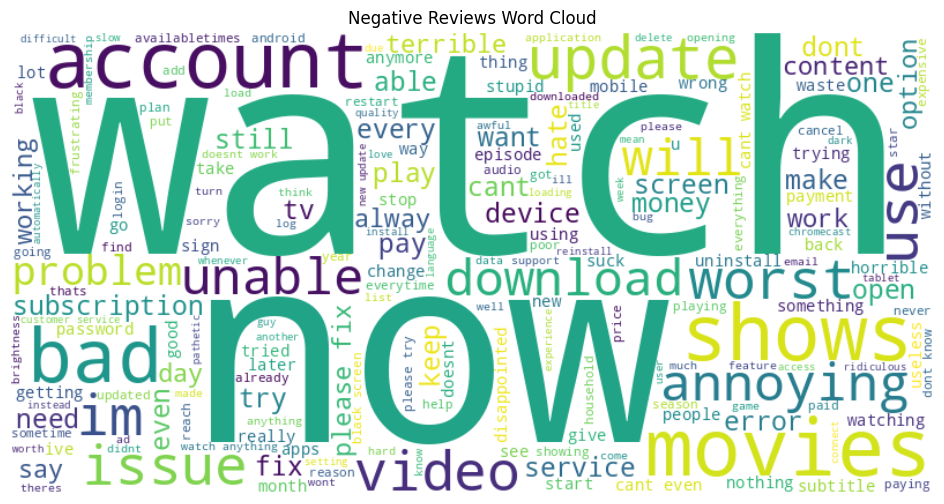

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 불용어 설정
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])

# df['sentiment_label'] 열에서 부정적인 리뷰만 필터링하여 negative_reviews 변수에 문자열 목록으로 저장하기
negative_reviews = df[df['sentiment_label'] == 'negative']['content'].tolist()

# 부정적인 리뷰를 하나의 문자열로 합치기
negative_reviews_text = " ".join(negative_reviews)

# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(negative_reviews_text)

# WordCloud 출력
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()
